In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 

sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')
from HOD import *
from ilc_params import *

sys.path.append('/Users/aleksandra/software/ILC/')
from deCIB_functions import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# Settings 

In [2]:
color = "blue"
nu_list = 93,100,143,145,217,225,280,353
nu_list_str = '93,100,143,145,217,225,280,353'


In [3]:
path_to_files = "/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-2-28_websky/ell_dl_"
#path_to_files = "/Users/aleksandra/Desktop/ilc-moto-2-28_websky/ell_dl_"

In [4]:

def plotfunction(linear=False, **kwargs):   
    plt.figure(figsize=(8,6))
    plt.title(r"", fontsize=30,  **kwargs )
    plt.xlabel(r"$\ell$", size=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)  
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    if linear == True:
        plt.yscale("linear")
        plt.xscale("linear")
         

In [5]:
if color=="blue":
    hod_pdict = blue_hod_pdict
    s = s_blue
    A_shot_noise = A_shot_noise_blue
if color=="green":
    hod_pdict = green_hod_pdict
    s = s_green
    A_shot_noise = A_shot_noise_green
if color=="red":
    hod_pdict = red_hod_pdict  
    s = s_red
    A_shot_noise = A_shot_noise_red
    
hod_pdict['galaxy_sample_id']

'blue'

## tSZ

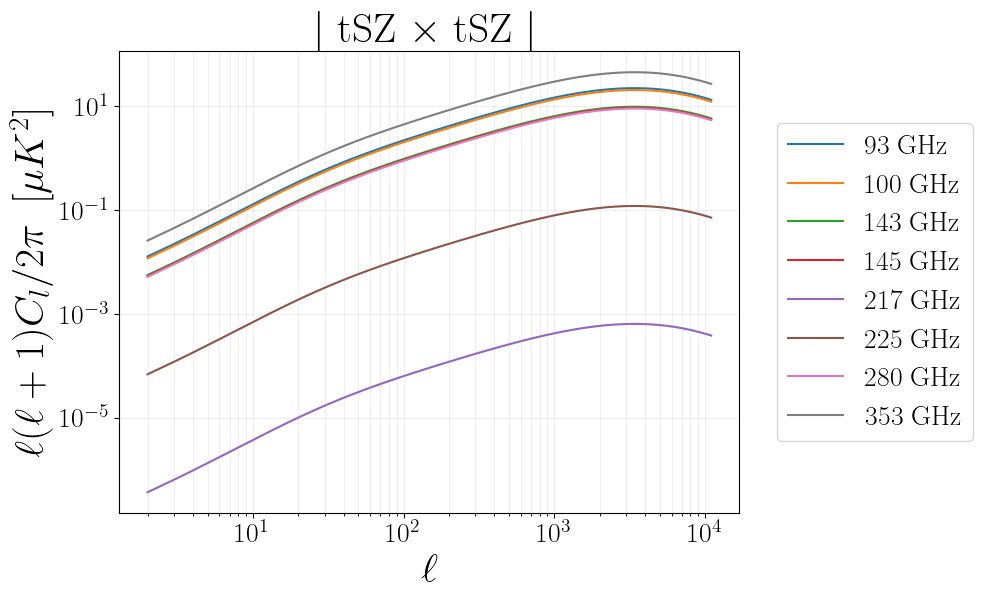

In [6]:
plotfunction()
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    plt.plot(ell, tsz, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB 

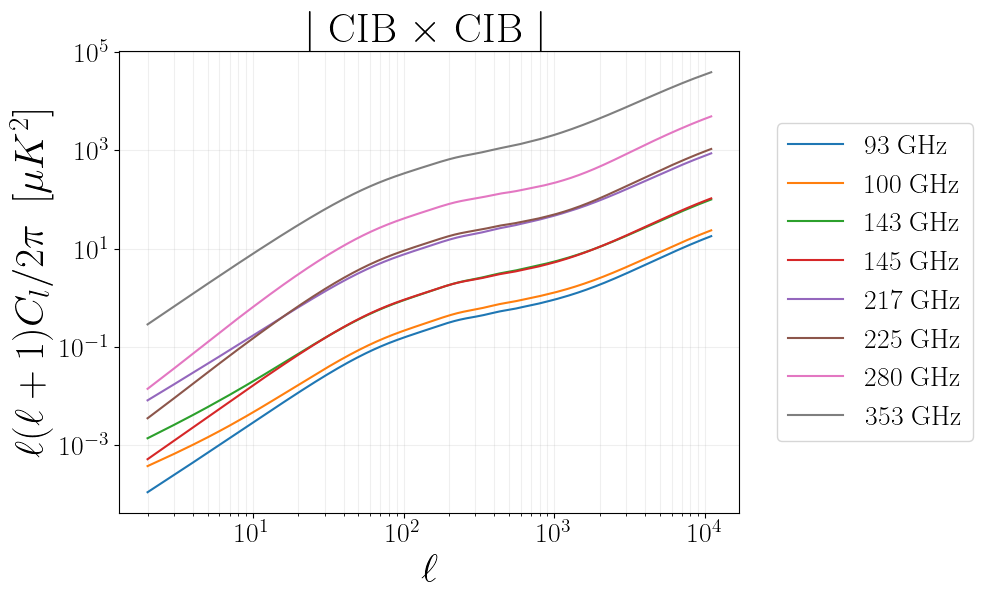

In [7]:
plotfunction()
plt.title("$|$ CIB $\\times$ CIB $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    plt.plot(ell, cib, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x CIB

93
100
143
145
217
225
280
353


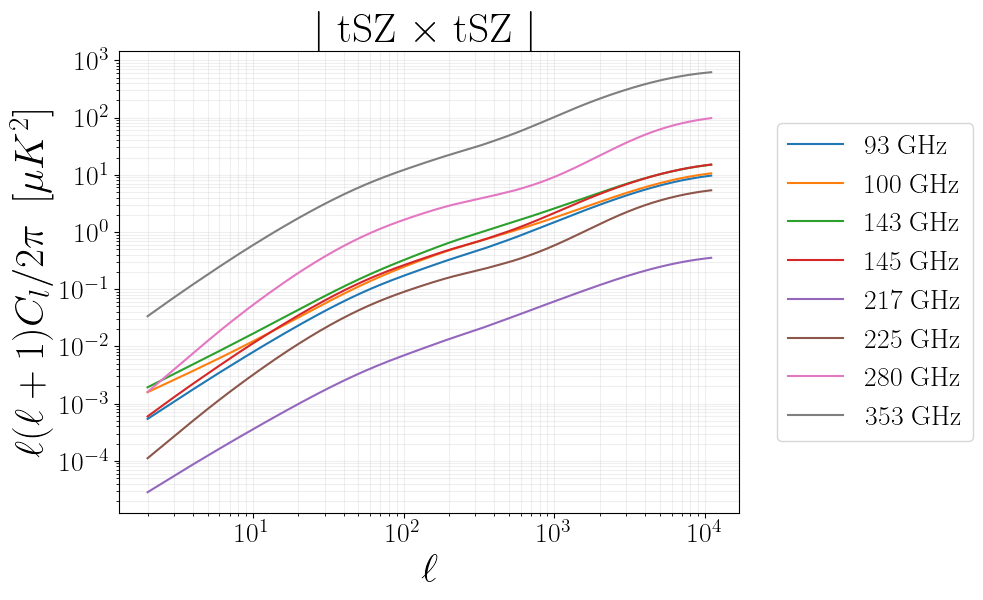

In [8]:
plotfunction()
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    print(nu)
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    plt.plot(ell, abs(tsz_cib), label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x g 

93
100
143
145
217
225
280
353


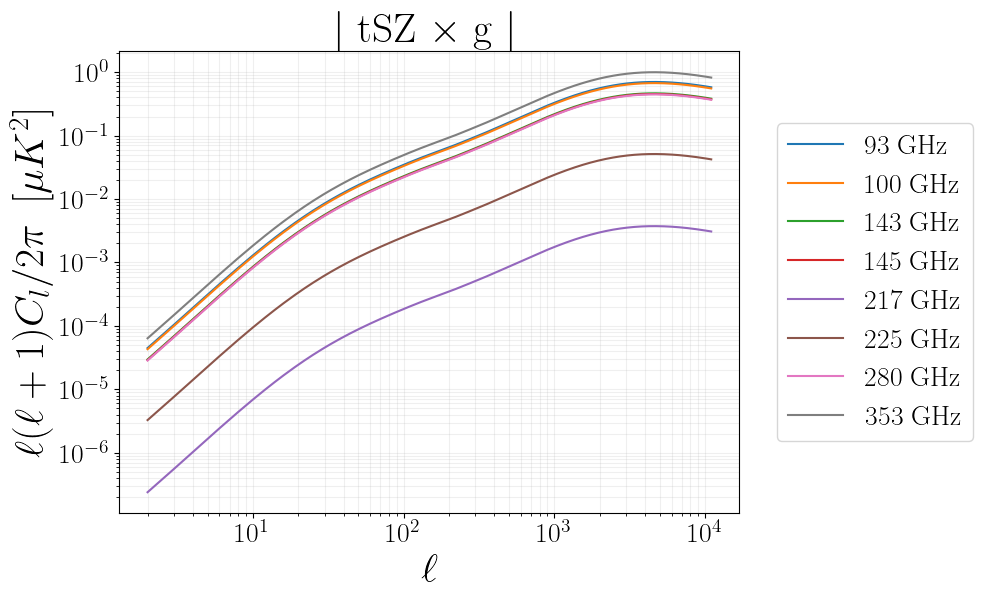

In [9]:
plotfunction()
plt.title("$|$ tSZ $\\times$ g $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    print(nu)
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt")
    plt.plot(ell, abs(tsz_g), label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

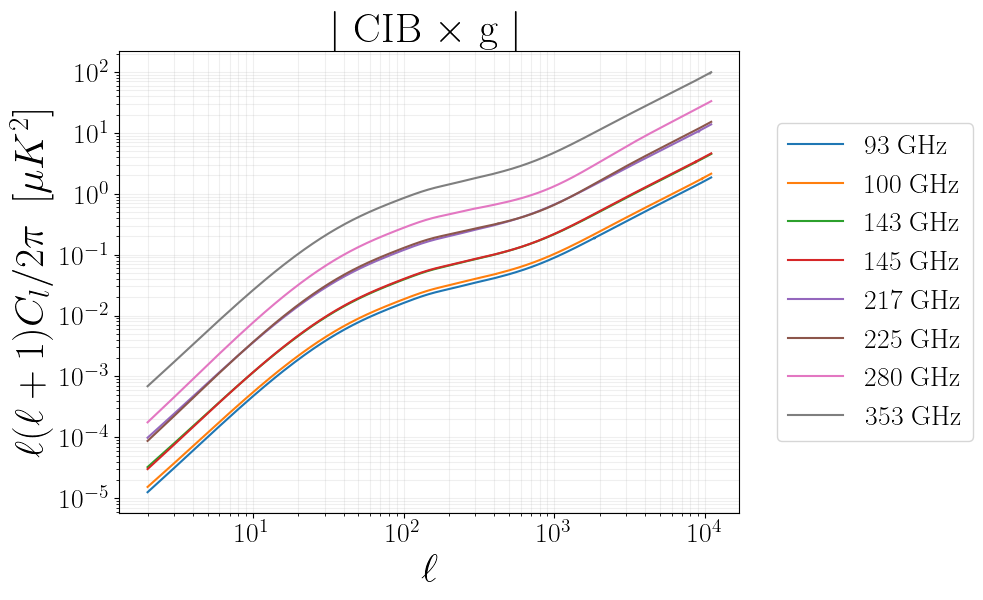

In [10]:
plotfunction()
plt.title("$|$ CIB $\\times$ g $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\, [\mu K^2]$", size=30)
#plt.yscale('linear')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    plt.plot(ell, cib_g, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  gg

/var/folders/nb/92bp6wq92qg_000bg2y5tcm00000gn/T/ipykernel_90455/2309866650.py:7: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0,0.0)


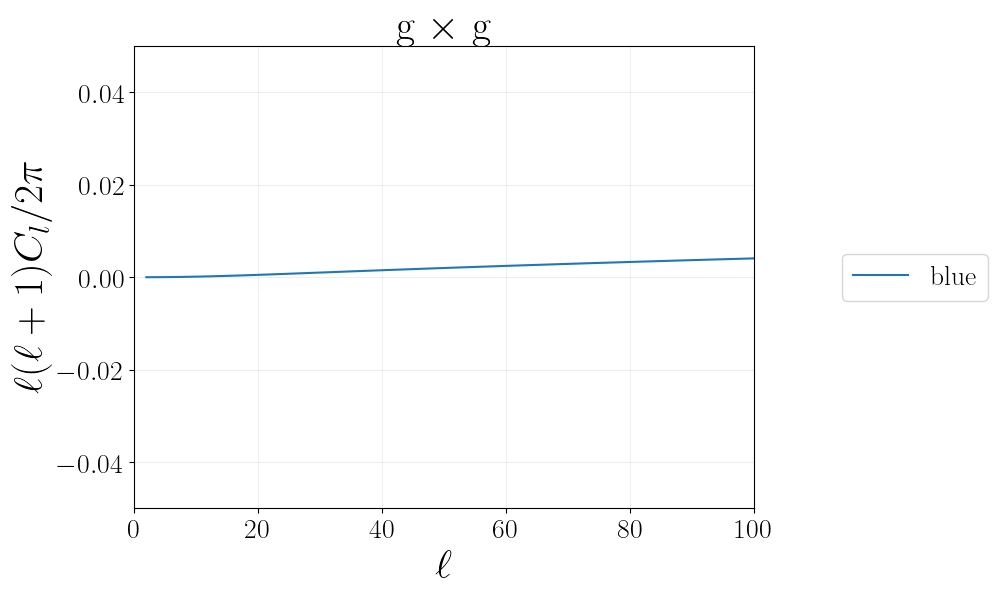

In [11]:
plotfunction()
plt.title(" g $\\times$ g ", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\,$", size=30)
plt.yscale('linear')
plt.xscale('linear')
plt.xlim(0,100)
plt.ylim(0,0.0)
ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
plt.plot(ell, gg, label = color)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

# Plot everything 

In [12]:
# ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
# cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

# for (i,nu) in enumerate(nu_list):
#     plotfunction()
#     #plt.figure(figsize=(12,8), dpi=250)
#     plt.xlabel(r"$\ell$", fontsize=30)
#     plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
#     plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
#     ## CMB
#     plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
#     plt.plot(ell, 1.e12*factor*cl_lensed['tt'],".",label='lensed TT')    
#     ## kSZ
#     #plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia, color = "red", label = "kSZ (Battaglia) ")
#     plt.plot(ell_theory_battaglia, CellkSZhomog[:,1], color = "red", label = "kSZ late (Battaglia) ")
#     plt.plot(ell_theory_battaglia, CellkSZpatchy[:,1],"--",  color = "red", label = "kSZ patchy (Battaglia) ")

#     ## tSZ
#     #plt.plot(cls_tSZ[i]['ell'],cls_tSZ[i]['1h']+cls_tSZ[i]['2h'], color="blue", label=r'tSZ')
#     tsz_tsz = yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2)
#     plt.plot(cl_sz['ell'],tsz_tsz, color="blue", label=r'tSZ')
      
#     ## CIB
#     cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
#     cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
#     CIB_uK = (cls_cib_1h+cls_cib_2h) / Jysr_to_uKcmb(nu) /Jysr_to_uKcmb(nu)
#     plt.plot(cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK, label=r'CIB')
    
#     ## gg
#     plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h+(5*s-2)*(cl_mm_1h+cl_mm_2h) ,color="brown", label=r'gg (unitless)')
    
#    ## noise
#     plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
#     plt.xlim(10, 8.e3)
#     plt.ylim(1e-4,6.e3)  

#     plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

#     ##Save the curves
#     if save_to_file == "yes":
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxCIB.txt", (cl_cib_cib[str(nu_list[1])+'x'+str(nu_list[1])]['ell'], CIB_uK))
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxtSZ.txt", (cl_sz['ell'],tsz_tsz))
# if save_to_file == "yes":
#     np.savetxt(path_save+"ell_dl_CMB_lensed.txt", (ell, 1.e12*factor*cl_lensed['tt']))
#     np.savetxt(path_save+"ell_dl_CMB.txt", (ell, 1.e12*factor*cl_tot['tt']))
#     np.savetxt(path_save+"ell_dl_gg_"+color+".txt", (cl_gg_ell, cl_gg_1h+cl_gg_2h))


In [13]:
# ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
# cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

# for (i,nu) in enumerate(nu_list):
#     plt.figure(figsize=(12,8), dpi=250)
#     plt.xlabel(r"$\ell$", fontsize=30)
#     plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
#     plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
#     # CMB
#     plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')  
#     ## gg
#     plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
#     # tSZ x g
#     yg = np.asarray(cl_tsz_g['1h'])+np.asarray(cl_tsz_g['2h'])
#     ym = np.asarray(cl_tsz_mu['1h'])+np.asarray(cl_tsz_mu['2h'])
#     tSZg_uK = yg*tSZ_spectral_funct_at_nu_in_GHz(nu)
#     tSZm_uK = ym*tSZ_spectral_funct_at_nu_in_GHz(nu)
#     plt.plot(cl_tsz_g['ell'],abs(tSZg_uK+(5*s-2)*tSZm_uK ), "--",color="lightblue", label=r'$|$tSZ x g$|$')
    
#     #CIB x g 
#     cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
#     cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
#     cl_cib_mu_1h = np.asarray(cl_cib_mu[str(nu_list[i])]['1h'])
#     cl_cib_mu_2h = np.asarray(cl_cib_mu[str(nu_list[i])]['2h'])
#     CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/Jysr_to_uKcmb(nu)
#     CIBm_uK = (cl_cib_mu_1h + cl_cib_mu_2h)/Jysr_to_uKcmb(nu)
#     plt.plot(cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK +(5*s-2)*CIBm_uK, color="lightgreen", label=r'CIB $\times$ g')

#     #tSZ x CIB 
#     ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
#     cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
#     cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
#     CIBtSZ_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)*tSZ_spectral_funct_at_nu_in_GHz(nu)/ Jysr_to_uKcmb(nu)
#     plt.plot(ell_tsz_cib, abs(CIBtSZ_uK), label=r'$|$ tSZ $\times$ CIB $|$')
    
#     #noise
#     plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.xlim(10, 8.e3)
#     #plt.ylim(1e-4,6.e3)  
#     plt.yticks(fontsize=20)
#     plt.xticks(fontsize=20)
#     plt.grid(which='both',alpha=0.2)
#     plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

#     ##Save the curves
#     if save_to_file == "yes":
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxCIB.txt", (ell_tsz_cib, CIBtSZ_uK))
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxg_"+color+".txt", (cl_tsz_g['ell'], tSZg_uK))
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxg_"+color+".txt", (cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK))
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt", (cl_tsz_g['ell'], tSZg_uK+(5*s-2)*tSZm_uK))
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt", (cl_cib_g[str(nu_list[1])]['ell'], CIBg_uK +(5*s-2)*CIBm_uK))
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxm_"+color+".txt", (cl_tsz_g['ell'], tSZm_uK))
#         np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxm_"+color+".txt", (cl_cib_g[str(nu_list[1])]['ell'],CIBm_uK))


# Correlation coefficients

## CIB x tSZ

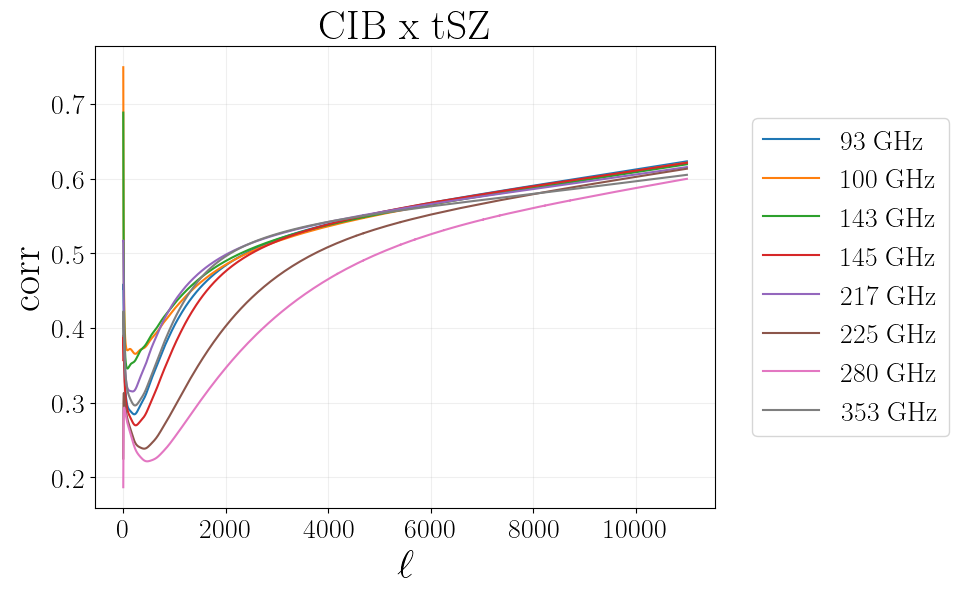

In [14]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)
plt.xscale('linear')
plt.yscale('linear')

for (i,nu) in enumerate(nu_list):
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")

    corr = abs(tsz_cib) /np.sqrt((cib)*tsz)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  tSZ x g 


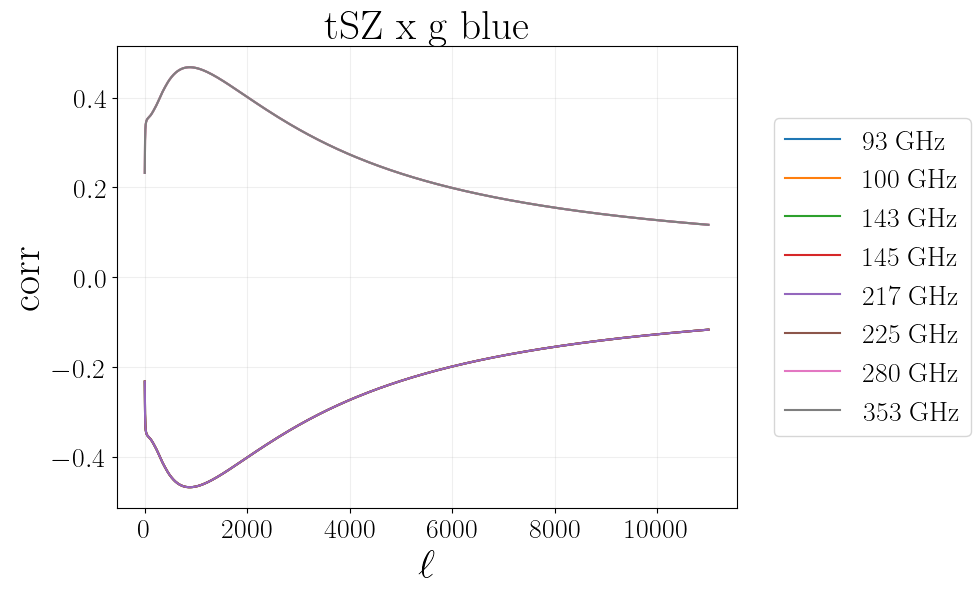

In [15]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('tSZ x g %.6s'%(color), fontsize=30)
plt.xscale('linear')
plt.yscale('linear')
for (i,nu) in enumerate(nu_list):
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg

    corr = (tsz_g) /np.sqrt((gg_full)*tsz)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

In [16]:
 A_shot_noise

8.664928830869256e-08

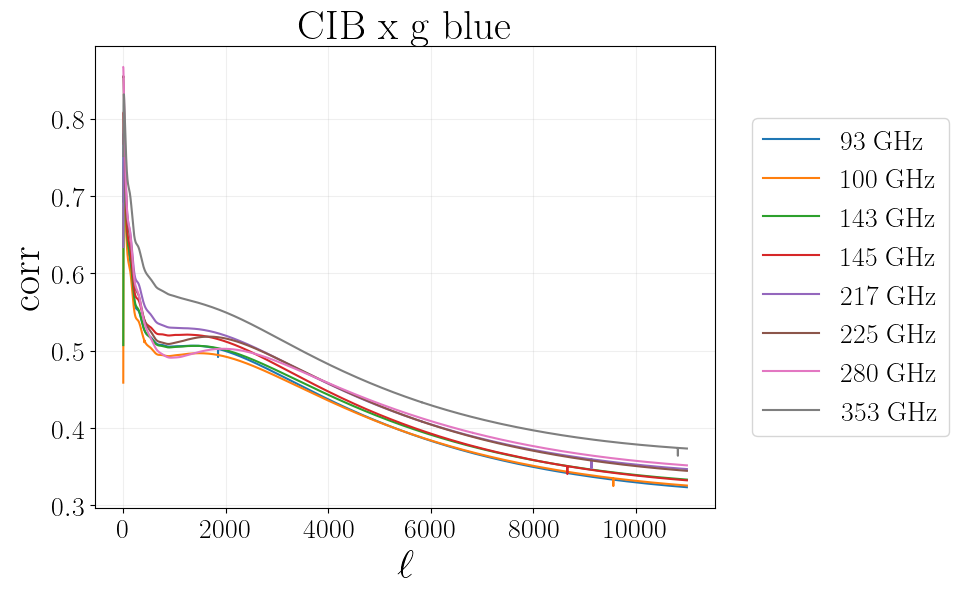

In [17]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g %.6s'%(color), fontsize=30)
plt.xscale('log')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg

    corr = (cib_g) /np.sqrt((gg_full)*cib)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
plt.yscale("linear")
plt.xscale("linear")

###  with CIB shot noise from Planck

In [18]:
cib_planck_table = {
'93':   0.15, 
'100':    0.15, 
'143':    1.2, 
 '145':   1.2, 
 '217':   16,    
 '225':   16, 
 '280':   120,  
 '353':   225
}

gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.02726309 0.02436109 0.02277356 ... 0.77903099 0.77904401 0.77905703]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.00655205 0.00739326 0.00803973 ... 0.68231253 0.68232909 0.68234565]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.00563545 0.00600936 0.00631824 ... 0.61556678 0.61558519 0.61560359]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.0144672  0.01215668 0.010912   ... 0.59622664 0.59624516 0.59626367]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.0078346  0.00739788 0.00719382 ... 0.60289196 0.60291112 0.60293029]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 

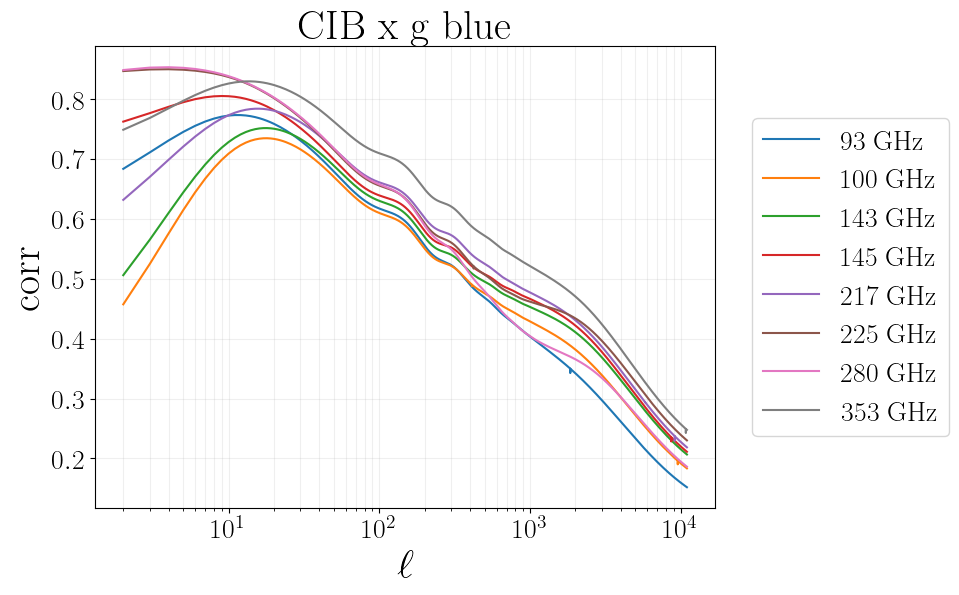

In [19]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g %.6s'%(color), fontsize=30)
plt.xscale('log')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg
    print("gg , shot noise % = ", SN_gg /( SN_gg+gg) )

    #CIB shot noise 
    cib_SN = cib_planck_table[str(nu)] * (ell)*(ell+1) /2/np.pi / Jysr_to_uKcmb(nu)**2
    cib_full = cib_SN +cib 
    print("CIB, shot noise % = ", cib_SN/(cib+cib_SN) )
    corr = (cib_g) /np.sqrt(gg_full*cib_full)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
plt.yscale("linear")


gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.02726309 0.02436109 0.02277356 ... 0.77903099 0.77904401 0.77905703]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.00655205 0.00739326 0.00803973 ... 0.68231253 0.68232909 0.68234565]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.00563545 0.00600936 0.00631824 ... 0.61556678 0.61558519 0.61560359]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.0144672  0.01215668 0.010912   ... 0.59622664 0.59624516 0.59626367]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 0.91286175 0.91287074]
CIB, shot noise % =  [0.0078346  0.00739788 0.00719382 ... 0.60289196 0.60291112 0.60293029]
gg , shot noise % =  [0.02842062 0.02209437 0.01859472 ... 0.91285276 

(0.2, 0.3)

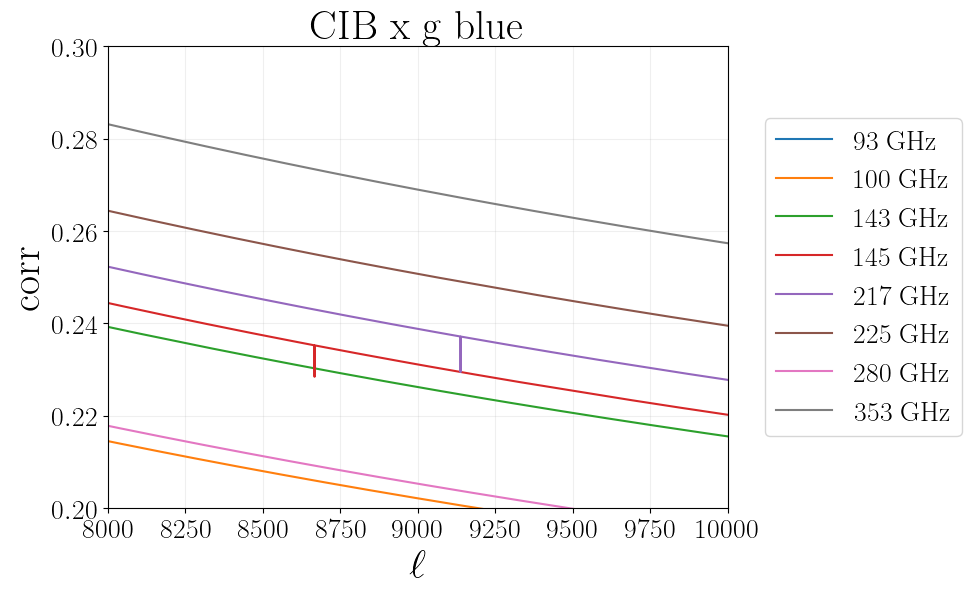

In [24]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g %.6s'%(color), fontsize=30)
plt.xscale('log')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg
    print("gg , shot noise % = ", SN_gg /( SN_gg+gg) )

    #CIB shot noise 
    cib_SN = cib_planck_table[str(nu)] * (ell)*(ell+1) /2/np.pi / Jysr_to_uKcmb(nu)**2
    cib_full = cib_SN +cib 
    print("CIB, shot noise % = ", cib_SN/(cib+cib_SN) )
    corr = (cib_g) /np.sqrt(gg_full*cib_full)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(8000,10000)
plt.ylim(0.2,0.3)

In [21]:
ng = 0.5*1e9/4/np.pi
1/ng

2.5132741228718345e-08